In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,cophenet,linkage
from scipy.spatial.distance import pdist

In [3]:
df = pd.read_csv('winequality-red+(1).csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
x = df.drop('quality',1)

# EDA

In [5]:
x.shape

(1599, 11)

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [7]:
x.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
x.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

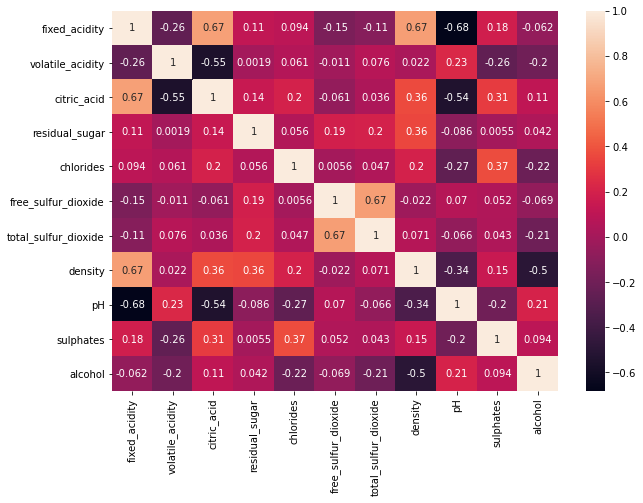

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(x.corr(),annot=True)
plt.show()

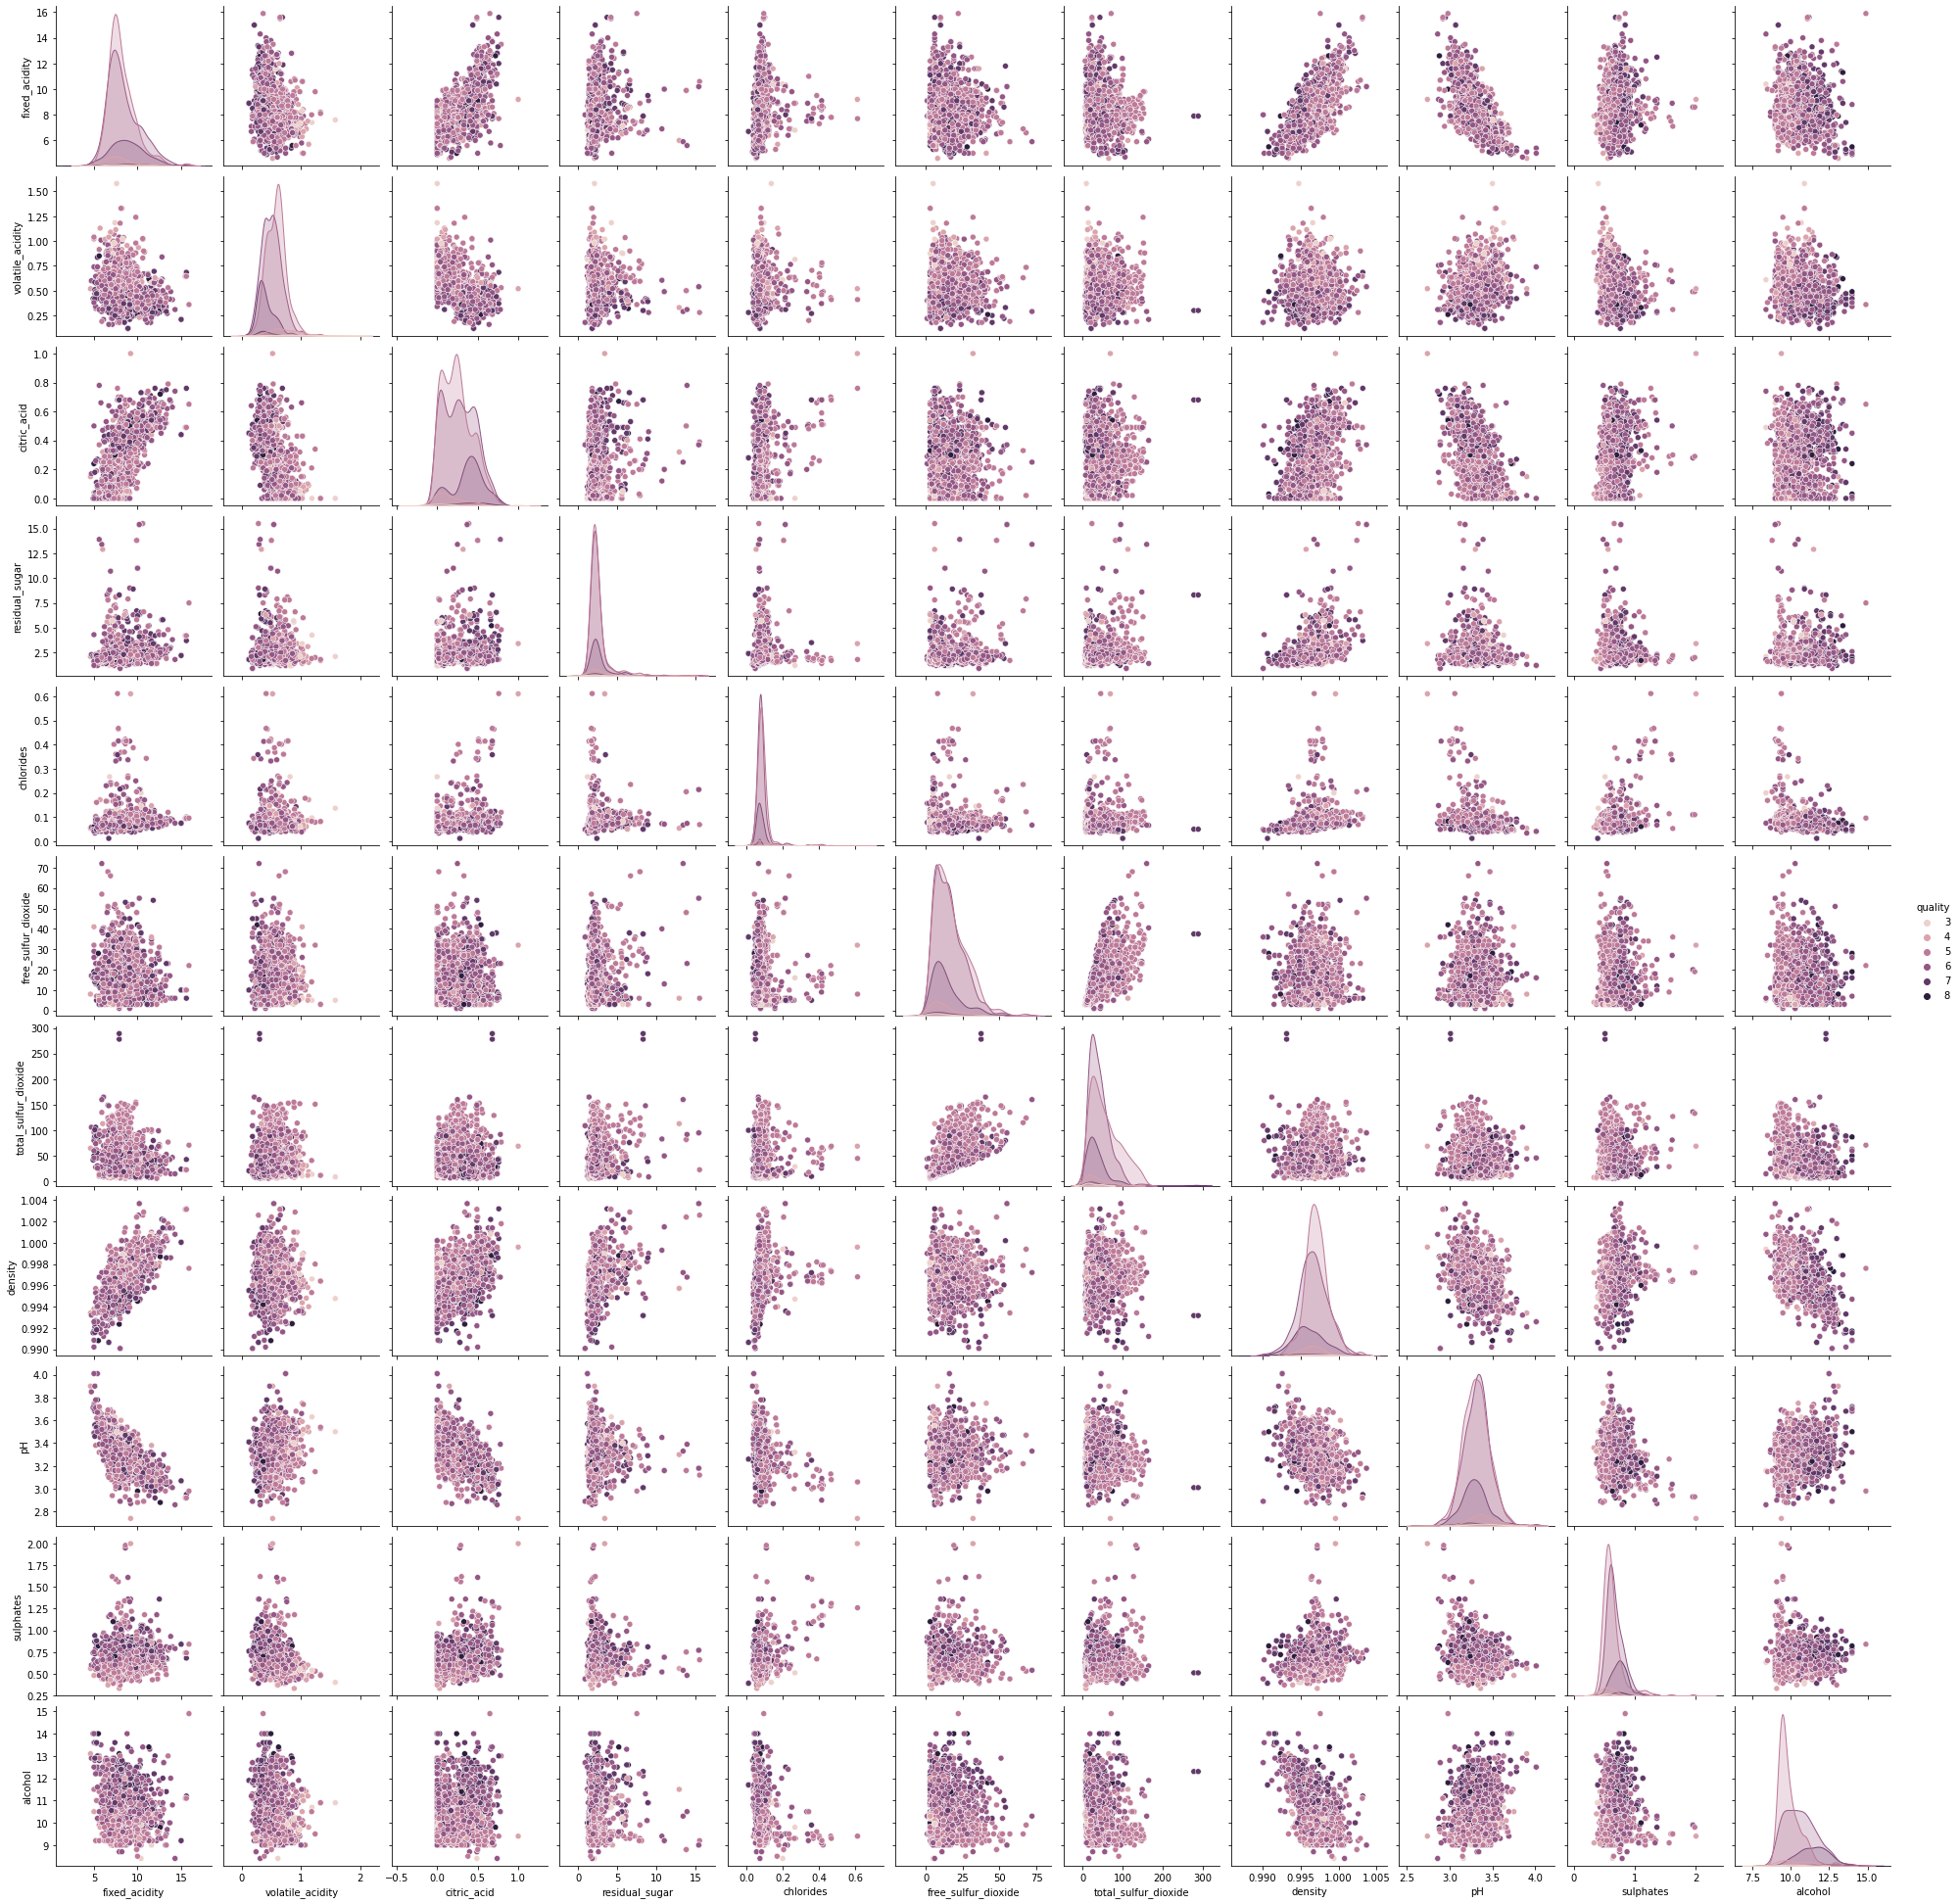

In [10]:
sns.pairplot(df,diag_kind='kde',hue='quality')
plt.show()

In [11]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


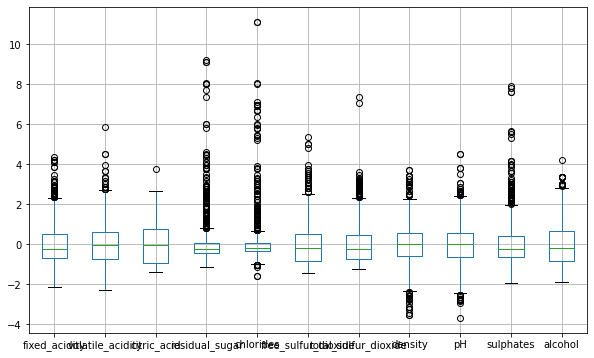

In [12]:
plt.figure(figsize=(10,6))
x_scaled.boxplot()
plt.show()

In [13]:
df_sc=x_scaled[~((x_scaled<(-3)) | (x_scaled>(3))).any(axis=1)]

In [ ]:
Observed some multicollinearity in data
pair wise relationship observed and noticed the classes were overalapping
scaled the data to common units
There were some outliers presence in data , worked out to remove the potential outliers
No null values were observed
five point summary noticed there were certain zeros, but have no domain knowledge to take call against those 0 values
Data types were matched
Separated the target column

In [ ]:
#AgglomerativeClustering

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH

1.Use feautes fixed acidity and volatile acidity

In [14]:
df_sc.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [15]:
x = df_sc[['fixed_acidity','volatile_acidity']]
link = ['single','complete','ward','average']
for i in link:
    z = linkage(x,method=i)
    c,coph = cophenet(z,pdist(x))
    print('Cophenetic value for',i,'is',c)

Cophenetic value for single is 0.5346792201232918
Cophenetic value for complete is 0.6788540682524279
Cophenetic value for ward is 0.6227443156716292
Cophenetic value for average is 0.6532992237968697


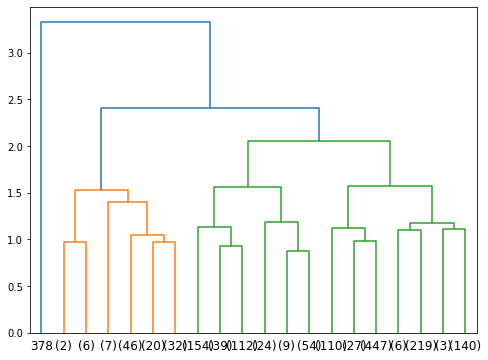

In [16]:
plt.figure(figsize=(8,6))
z_avg = linkage(x,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

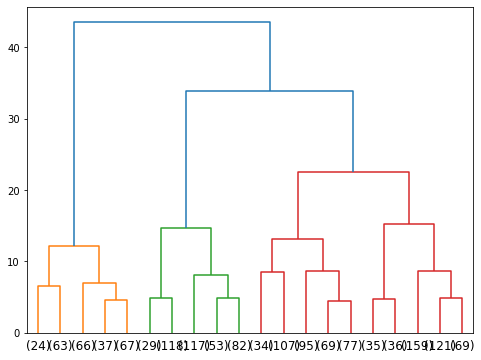

In [17]:
plt.figure(figsize=(8,6))
z_ward = linkage(x,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

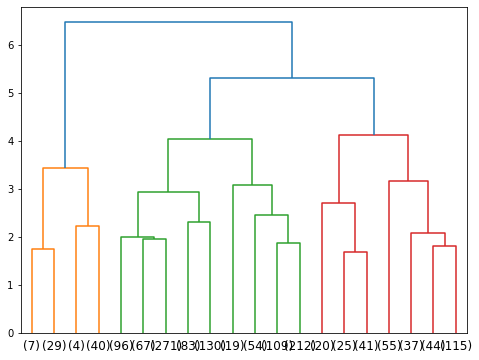

In [18]:
plt.figure(figsize=(8,6))
z_complete = linkage(x,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

In [19]:
k = [2,3,4,5]
link = ['complete','average','ward']

for i in k:
    for l in link:
        agg = AgglomerativeClustering(n_clusters=i,linkage=l)
        agg.fit(x)
        label = agg.labels_
        score = silhouette_score(x,label,random_state=10)
        print('The Score for ', i , 'clusters with ', l , 'Linkage is' , score)
    
    print('\n')

The Score for  2 clusters with  complete Linkage is 0.3522975849520399
The Score for  2 clusters with  average Linkage is 0.4700424926004692
The Score for  2 clusters with  ward Linkage is 0.41282978643493906


The Score for  3 clusters with  complete Linkage is 0.3497111113545061
The Score for  3 clusters with  average Linkage is 0.2930001964267225
The Score for  3 clusters with  ward Linkage is 0.3553634852759491


The Score for  4 clusters with  complete Linkage is 0.2832977768714816
The Score for  4 clusters with  average Linkage is 0.31325782122795875
The Score for  4 clusters with  ward Linkage is 0.3320530242179155


The Score for  5 clusters with  complete Linkage is 0.28876862472888465
The Score for  5 clusters with  average Linkage is 0.3450621785900072
The Score for  5 clusters with  ward Linkage is 0.329385264708259




In [20]:
agg = AgglomerativeClustering(linkage='ward',n_clusters=3)
agg.fit(x)
labels2 = agg.labels_
x['labels2'] = labels2
x.sample(5)

,fixed_acidity,volatile_acidity,labels2
705,0.046171,2.833346,0
669,1.712309,-1.049255,1
1110,-0.011282,0.012176,0
51,-0.987984,-0.043689,2
314,-0.528360,-0.937525,2


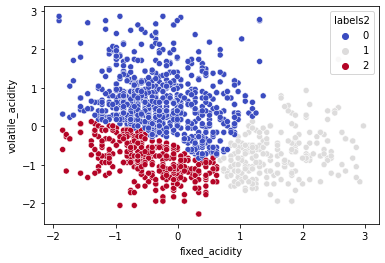

In [21]:
sns.scatterplot(x['fixed_acidity'],x['volatile_acidity'],hue=x['labels2'],palette='coolwarm')
plt.show()

Use feautes Cirtic acidity and fixed acidity

In [22]:
x1 = df_sc[['citric_acid','fixed_acidity']]
link = ['single','complete','ward','average']
for i in link:
    z = linkage(x1,method=i)
    c,coph = cophenet(z,pdist(x1))
    print('Cophenetic value for',i,'is',c)

Cophenetic value for single is 0.4575166131556235
Cophenetic value for complete is 0.7058999994124057
Cophenetic value for ward is 0.5988181994993238
Cophenetic value for average is 0.7350676181679261


In [23]:
k = [2,3,4,5]
link = ['complete','average','ward']

for i in k:
    for l in link:
        agg = AgglomerativeClustering(n_clusters=i,linkage=l)
        agg.fit(x1)
        label = agg.labels_
        score = silhouette_score(x1,label,random_state=10)
        print('The Score for ', i , 'clusters with ', l , 'Linkage is' , score)
    
    print('\n')


The Score for  2 clusters with  complete Linkage is 0.46578886726334906
The Score for  2 clusters with  average Linkage is 0.4954593802543918
The Score for  2 clusters with  ward Linkage is 0.3934847912744144


The Score for  3 clusters with  complete Linkage is 0.355755041534857
The Score for  3 clusters with  average Linkage is 0.4233322441704437
The Score for  3 clusters with  ward Linkage is 0.4111529894416408


The Score for  4 clusters with  complete Linkage is 0.3427817760830626
The Score for  4 clusters with  average Linkage is 0.372532122995375
The Score for  4 clusters with  ward Linkage is 0.37490156036987665


The Score for  5 clusters with  complete Linkage is 0.36677438973934506
The Score for  5 clusters with  average Linkage is 0.32085838616352874
The Score for  5 clusters with  ward Linkage is 0.37385294454072066




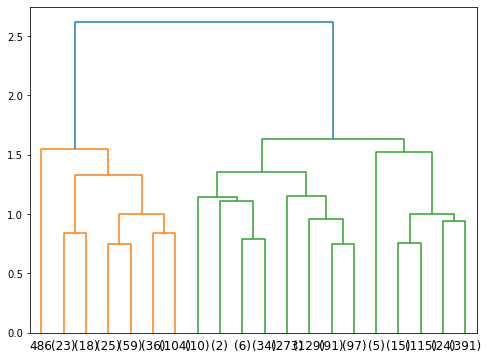

In [24]:
plt.figure(figsize=(8,6))
z_avg = linkage(x1,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

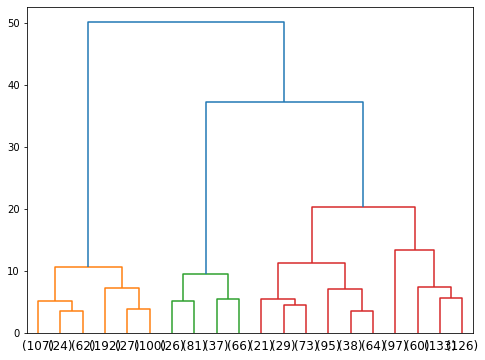

In [25]:
plt.figure(figsize=(8,6))
z_ward = linkage(x1,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

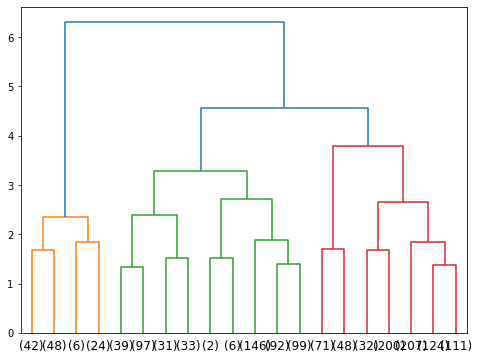

In [26]:
plt.figure(figsize=(8,6))
z_complete = linkage(x1,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

AgglomerativeClustering with ward linkage and 3 clusters

In [27]:
agg = AgglomerativeClustering(linkage='ward',n_clusters=3)
agg.fit(x1)
labels2 = agg.labels_
x1['labels3'] = labels2
x1.sample(5)

,citric_acid,fixed_acidity,labels3
687,-0.210412,0.448342,0
207,0.200392,-0.298547,0
537,-0.159061,-0.126188,0
401,0.149042,-0.356000,0
704,-1.186070,0.448342,1


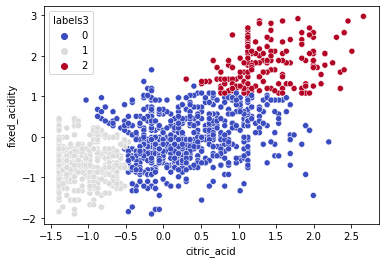

In [28]:
sns.scatterplot(x1['citric_acid'],x1['fixed_acidity'],hue=x1['labels3'],palette='coolwarm')
plt.show()

3.Use feautes residual suger and sulphades

In [29]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
x2 = df_sc[['residual_sugar','sulphates']]
link = ['single','complete','ward','average']
for i in link:
    z = linkage(x2,method=i)
    c,coph = cophenet(z,pdist(x2))
    print('Cophenetic value for',i,'is',c)

Cophenetic value for single is 0.6840766434660593
Cophenetic value for complete is 0.5330456181239859
Cophenetic value for ward is 0.6720778263598055
Cophenetic value for average is 0.8296341868567125


In [31]:
k = [2,3,4,5]
link = ['complete','average','ward']

for i in k:
    for l in link:
        agg = AgglomerativeClustering(n_clusters=i,linkage=l)
        agg.fit(x2)
        label = agg.labels_
        score = silhouette_score(x2,label,random_state=10)
        print('The Score for ', i , 'clusters with ', l , 'Linkage is' , score)
    
    print('\n')


The Score for  2 clusters with  complete Linkage is 0.36988812067764215
The Score for  2 clusters with  average Linkage is 0.6039842244157086
The Score for  2 clusters with  ward Linkage is 0.44682653449786


The Score for  3 clusters with  complete Linkage is 0.3776784328877822
The Score for  3 clusters with  average Linkage is 0.53946621252436
The Score for  3 clusters with  ward Linkage is 0.49582555781331983


The Score for  4 clusters with  complete Linkage is 0.4173930855638463
The Score for  4 clusters with  average Linkage is 0.5270446269827718
The Score for  4 clusters with  ward Linkage is 0.3222596575431622


The Score for  5 clusters with  complete Linkage is 0.3935153266960604
The Score for  5 clusters with  average Linkage is 0.30356001716197123
The Score for  5 clusters with  ward Linkage is 0.33004016386456725




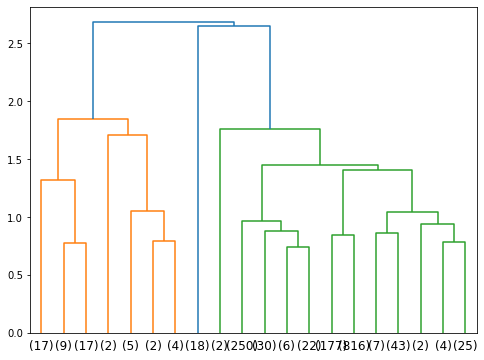

In [32]:
plt.figure(figsize=(8,6))
z_avg = linkage(x2,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

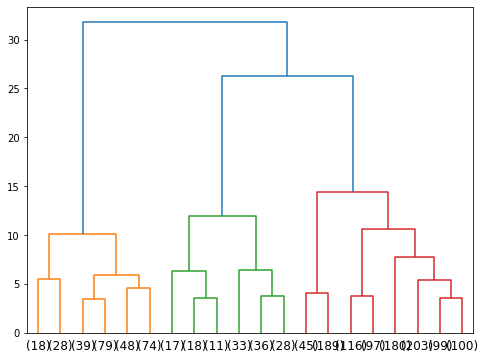

In [33]:
plt.figure(figsize=(8,6))
z_ward = linkage(x2,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

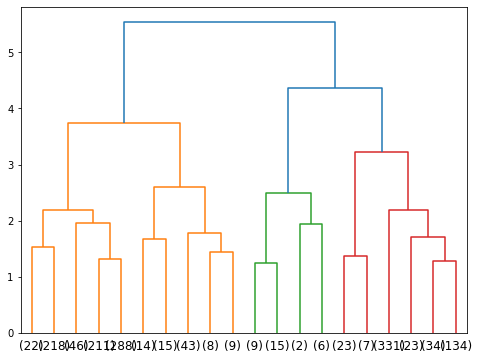

In [34]:
plt.figure(figsize=(8,6))
z_complete = linkage(x2,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

AgglomerativeClustering with ward linkage and 3 clusters

In [35]:
agg = AgglomerativeClustering(linkage='ward',n_clusters=3)
agg.fit(x2)
labels2 = agg.labels_
x2['labels3'] = labels2
x2.sample(5)

,residual_sugar,sulphates,labels3
343,-0.524166,0.542042,1
1328,-0.524166,-0.815259,0
465,0.256260,1.486251,1
457,0.114364,-0.461180,0
1160,-0.169427,0.365003,0


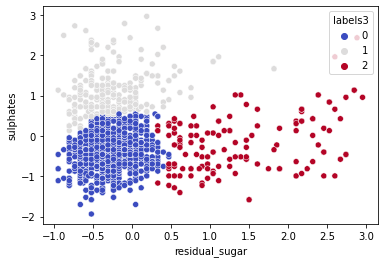

In [36]:
sns.scatterplot(x2['residual_sugar'],x2['sulphates'],hue=x2['labels3'],palette='coolwarm')
plt.show()

4.Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [38]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
x3 = df_sc[['free_sulfur_dioxide','total_sulfur_dioxide']]
link = ['single','complete','ward','average']
for i in link:
    z = linkage(x3,method=i)
    c,coph = cophenet(z,pdist(x3))
    print('Cophenetic value for',i,'is',c)

Cophenetic value for single is 0.6240653861023227
Cophenetic value for complete is 0.7293720175815969
Cophenetic value for ward is 0.7188716286637298
Cophenetic value for average is 0.7751143216967021


In [40]:
k = [2,3,4,5]
link = ['complete','average','ward']

for i in k:
    for l in link:
        agg = AgglomerativeClustering(n_clusters=i,linkage=l)
        agg.fit(x3)
        label = agg.labels_
        score = silhouette_score(x3,label,random_state=10)
        print('The Score for ', i , 'clusters with ', l , 'Linkage is' , score)
    
    print('\n')

The Score for  2 clusters with  complete Linkage is 0.45263391802099046
The Score for  2 clusters with  average Linkage is 0.5660976213399536
The Score for  2 clusters with  ward Linkage is 0.5407316212956117


The Score for  3 clusters with  complete Linkage is 0.4079342008149353
The Score for  3 clusters with  average Linkage is 0.509951281599186
The Score for  3 clusters with  ward Linkage is 0.5050795943191589


The Score for  4 clusters with  complete Linkage is 0.4867424366513822
The Score for  4 clusters with  average Linkage is 0.5167313255292031
The Score for  4 clusters with  ward Linkage is 0.4052752549132464


The Score for  5 clusters with  complete Linkage is 0.4809944775472482
The Score for  5 clusters with  average Linkage is 0.509517987863072
The Score for  5 clusters with  ward Linkage is 0.43012735262271956




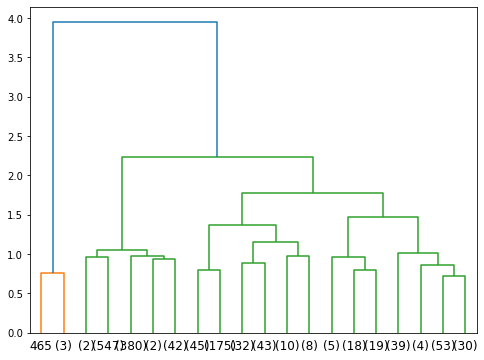

In [41]:
plt.figure(figsize=(8,6))
z_avg = linkage(x3,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

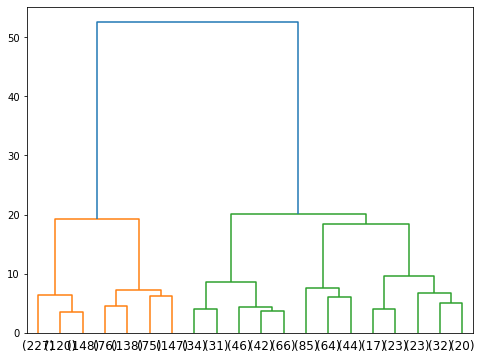

In [42]:
plt.figure(figsize=(8,6))
z_ward = linkage(x3,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

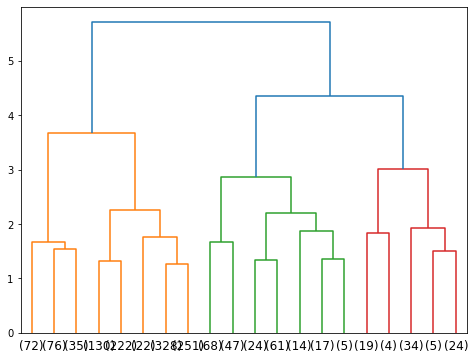

In [43]:
plt.figure(figsize=(8,6))
z_complete = linkage(x3,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

AgglomerativeClustering with ward linkage and 2 clusters

In [44]:
agg = AgglomerativeClustering(linkage='ward',n_clusters=2)
agg.fit(x3)
labels2 = agg.labels_
x3['labels3'] = labels2
x3.sample(5)

,free_sulfur_dioxide,total_sulfur_dioxide,labels3
4,-0.466193,-0.379133,1
1433,-0.466193,-0.652813,1
1512,-0.466193,-0.896085,1
758,-0.561823,-0.470360,1
1519,-0.179300,-0.591995,1


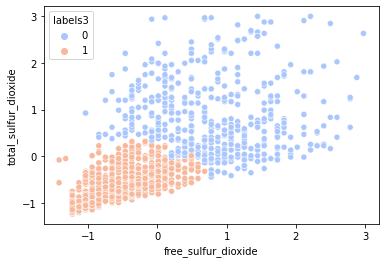

In [45]:
sns.scatterplot(x3['free_sulfur_dioxide'],x3['total_sulfur_dioxide'],hue=x3['labels3'],palette='coolwarm')
plt.show()

5.Use feautes fixed acidity, citric acidity and volatile acidity

In [47]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
x4 = df_sc[['fixed_acidity','citric_acid','volatile_acidity']]
link = ['single','complete','ward','average']
for i in link:
    z = linkage(x4,method=i)
    c,coph = cophenet(z,pdist(x4))
    print('Cophenetic value for',i,'is',c)

Cophenetic value for single is 0.34872685329983827
Cophenetic value for complete is 0.5711908544972452
Cophenetic value for ward is 0.6559987762406033
Cophenetic value for average is 0.6451649873167485


In [49]:
k = [2,3,4,5]
link = ['complete','average','ward']

for i in k:
    for l in link:
        agg = AgglomerativeClustering(n_clusters=i,linkage=l)
        agg.fit(x4)
        label = agg.labels_
        score = silhouette_score(x4,label,random_state=10)
        print('The Score for ', i , 'clusters with ', l , 'Linkage is' , score)
    
    print('\n')


The Score for  2 clusters with  complete Linkage is 0.3142465106960941
The Score for  2 clusters with  average Linkage is 0.4695843928814944
The Score for  2 clusters with  ward Linkage is 0.4288343457798406


The Score for  3 clusters with  complete Linkage is 0.30342495688913745
The Score for  3 clusters with  average Linkage is 0.28039792708568984
The Score for  3 clusters with  ward Linkage is 0.280113929462757


The Score for  4 clusters with  complete Linkage is 0.2921994460447929
The Score for  4 clusters with  average Linkage is 0.35534750512049856
The Score for  4 clusters with  ward Linkage is 0.2537129309601925


The Score for  5 clusters with  complete Linkage is 0.2495195622833289
The Score for  5 clusters with  average Linkage is 0.2997794694862516
The Score for  5 clusters with  ward Linkage is 0.26482926269292545




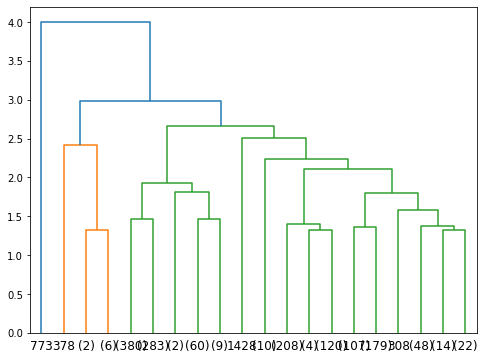

In [50]:
plt.figure(figsize=(8,6))
z_avg = linkage(x4,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

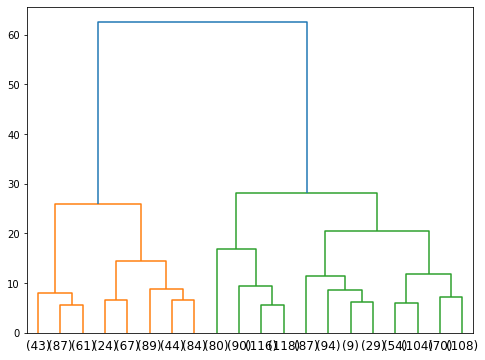

In [51]:
plt.figure(figsize=(8,6))
z_ward = linkage(x4,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

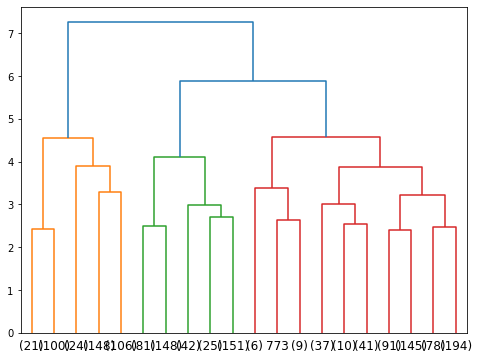

In [52]:
plt.figure(figsize=(8,6))
z_complete = linkage(x4,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

AgglomerativeClustering with ward linkage and 2 clusters

In [53]:
agg = AgglomerativeClustering(linkage='ward',n_clusters=2)
agg.fit(x4)
labels2 = agg.labels_
x4['labels3'] = labels2
x4.sample(5)

,fixed_acidity,citric_acid,volatile_acidity,labels3
1399,-0.643266,-1.391472,0.794282,0
161,-0.413454,-1.288771,0.850147,0
1268,-0.815625,0.200392,-0.658202,0
1152,-0.011282,-0.107711,0.403229,0
1509,-0.241094,0.662546,-1.943091,1


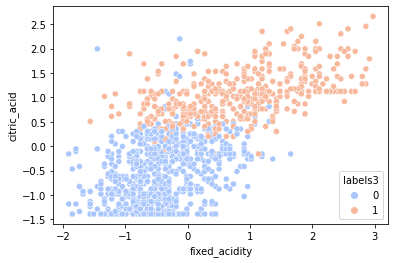

In [54]:
sns.scatterplot(x4['fixed_acidity'],x4['citric_acid'],hue=x4['labels3'],palette='coolwarm')
plt.show()

6.Use feautes density and pH

In [55]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
x5 = df_sc[['density','pH']]
link = ['single','complete','ward','average']
for i in link:
    z = linkage(x5,method=i)
    c,coph = cophenet(z,pdist(x5))
    print('Cophenetic value for',i,'is',c)

Cophenetic value for single is 0.5768308013640083
Cophenetic value for complete is 0.586555699228086
Cophenetic value for ward is 0.48117125026231805
Cophenetic value for average is 0.6258769924952968


In [57]:
k = [2,3,4,5]
link = ['complete','average','ward']

for i in k:
    for l in link:
        agg = AgglomerativeClustering(n_clusters=i,linkage=l)
        agg.fit(x5)
        label = agg.labels_
        score = silhouette_score(x5,label,random_state=10)
        print('The Score for ', i , 'clusters with ', l , 'Linkage is' , score)
    
    print('\n')


The Score for  2 clusters with  complete Linkage is 0.3651755617208325
The Score for  2 clusters with  average Linkage is 0.4469571827406576
The Score for  2 clusters with  ward Linkage is 0.2858469675735112


The Score for  3 clusters with  complete Linkage is 0.24956312677849918
The Score for  3 clusters with  average Linkage is 0.249061839655297
The Score for  3 clusters with  ward Linkage is 0.28947209913645694


The Score for  4 clusters with  complete Linkage is 0.2269774070961405
The Score for  4 clusters with  average Linkage is 0.21109685401922204
The Score for  4 clusters with  ward Linkage is 0.30097093706588657


The Score for  5 clusters with  complete Linkage is 0.2338874337673492
The Score for  5 clusters with  average Linkage is 0.2398977483755122
The Score for  5 clusters with  ward Linkage is 0.2981298930730871




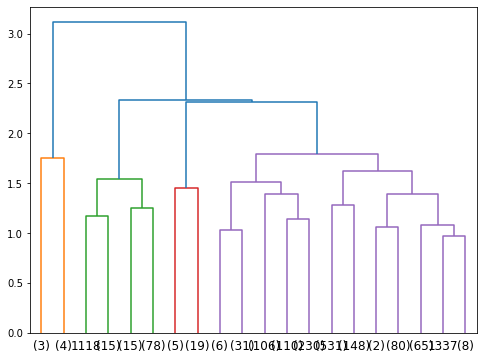

In [58]:
plt.figure(figsize=(8,6))
z_avg = linkage(x5,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

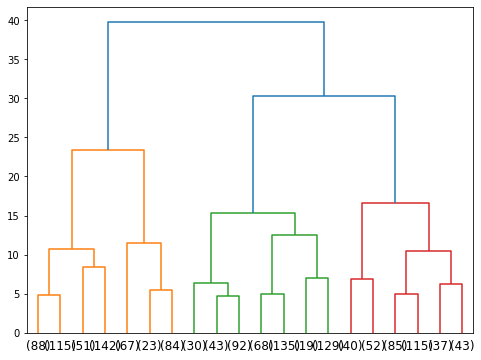

In [59]:
plt.figure(figsize=(8,6))
z_ward = linkage(x5,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

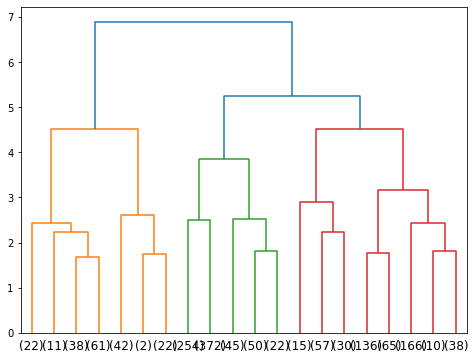

In [60]:
plt.figure(figsize=(8,6))
z_complete = linkage(x5,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

AgglomerativeClustering with ward linkage and 2 clusters

In [61]:
agg = AgglomerativeClustering(linkage='ward',n_clusters=2)
agg.fit(x5)
labels2 = agg.labels_
x5['labels3'] = labels2
x5.sample(5)

,density,pH,labels3
624,1.565300,0.964679,0
1318,-0.310948,-0.331177,1
632,-0.183745,0.057580,0
1148,-0.787960,0.511130,0
1201,-1.355075,-0.266384,0


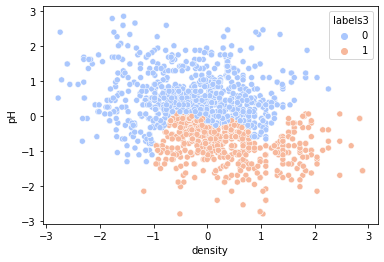

In [62]:
sns.scatterplot(x5['density'],x5['pH'],hue=x5['labels3'],palette='coolwarm')
plt.show()